In [2]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FRespuestastyfdefiltrosFIReIIR import FIRrespt,IIRrespt,FIRrespf,IIRrespf

importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb
importing Jupyter notebook from FRespuestastyfdefiltrosFIReIIR.ipynb


# Transformada Z

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-30 a la(s) 17.36.00.png">
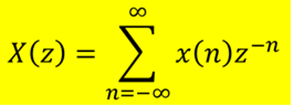

### Ejemplo 1: Determina la TZ y la ROC de la secuencia: x(n) = n e^(-a n) para n>=n0

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-30 a la(s) 17.39.02.png">
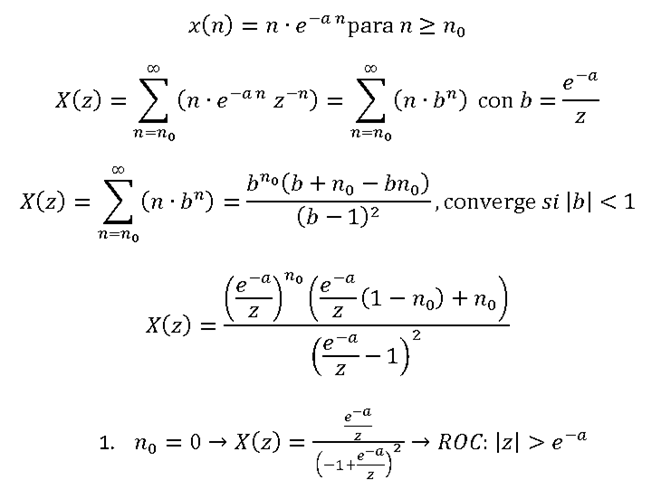

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-30 a la(s) 17.39.57.png">

### Analizar otros casos.. por ej: n0 = 1, n0 > 1, etc..

### Ejemplo 2: Encuentra la función de transferencia de un FPM No recursivo y Causal de orden 3.

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-30 a la(s) 17.43.04.png">
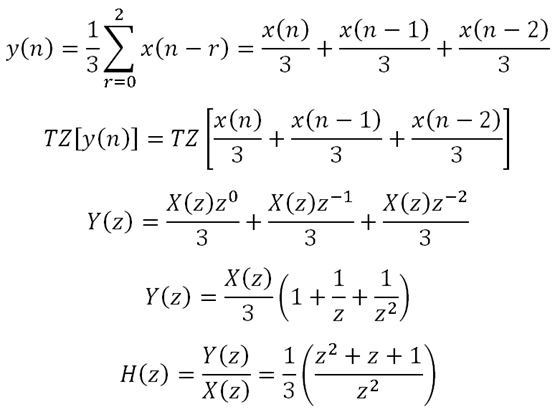

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-30 a la(s) 17.43.31.png">

### La función para encontrar las raices de un polinomio es "np.roots()"

- - -

### Ejemplo:

In [3]:
np.roots(np.array([2,3,1])) # Calculo las raices de la ecuación 2x^2+3x+1=0

array([-1. , -0.5])

- - -

In [4]:
ceros = np.roots(np.array([1,1,1])); polos = np.roots(np.array([1,0,0]))
ceros, polos

(array([-0.5+0.8660254j, -0.5-0.8660254j]), array([0., 0.]))

### Si reescribimos H(z) en términos de sus polos y ceros:

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-30 a la(s) 17.48.15.png">
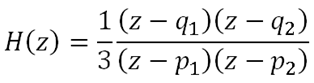

In [5]:
def Circunferencia(x0,y0,r):
    phi = np.arange(0,2*np.pi,0.001)
    return x0 + r*np.cos(phi), y0 + r*np.sin(phi)

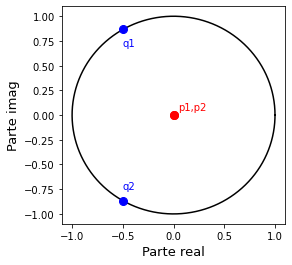

In [6]:
plt.figure(figsize=(4,4))
plt.plot(*Circunferencia(0,0,1), c='k')
plt.plot(ceros.real,ceros.imag,'bo',ms=8)
plt.plot(polos.real,polos.imag,'ro',ms=8)
plt.text(0.05,0.05,s='p1,p2',c='r')
plt.text(-0.5,0.7,s='q1',c='b')
plt.text(-0.5,-0.75,s='q2',c='b')
plt.xlabel('Parte real', fontsize=13)
plt.ylabel('Parte imag', fontsize=13)
plt.show()

### El ángulo ω correspondiente a un polo/cero se obtiene de la relación:

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-30 a la(s) 17.51.29.png">

In [9]:
q1 = ceros[0]; q2 = ceros[1]; p1 = polos[0]; p2 = polos[1]
w1 = (-1j*np.log(q1)).real * 180/np.pi; w2 = (-1j*np.log(q2)).real * 180/np.pi;
w1, w2

(120.00000000000001, -120.00000000000001)

In [10]:
q1

(-0.49999999999999994+0.8660254037844385j)

### Para encontrar la respuesta en frecuencia del FPM de orden 3, reemplazo z por e^(j ω) 

In [46]:
w = np.linspace(-np.pi,np.pi, 1000)
H = (1/3)*(np.exp(1j*w)-q1)*(np.exp(1j*w)-q2)/((np.exp(1j*w)-p1)*(np.exp(1j*w)-p2))

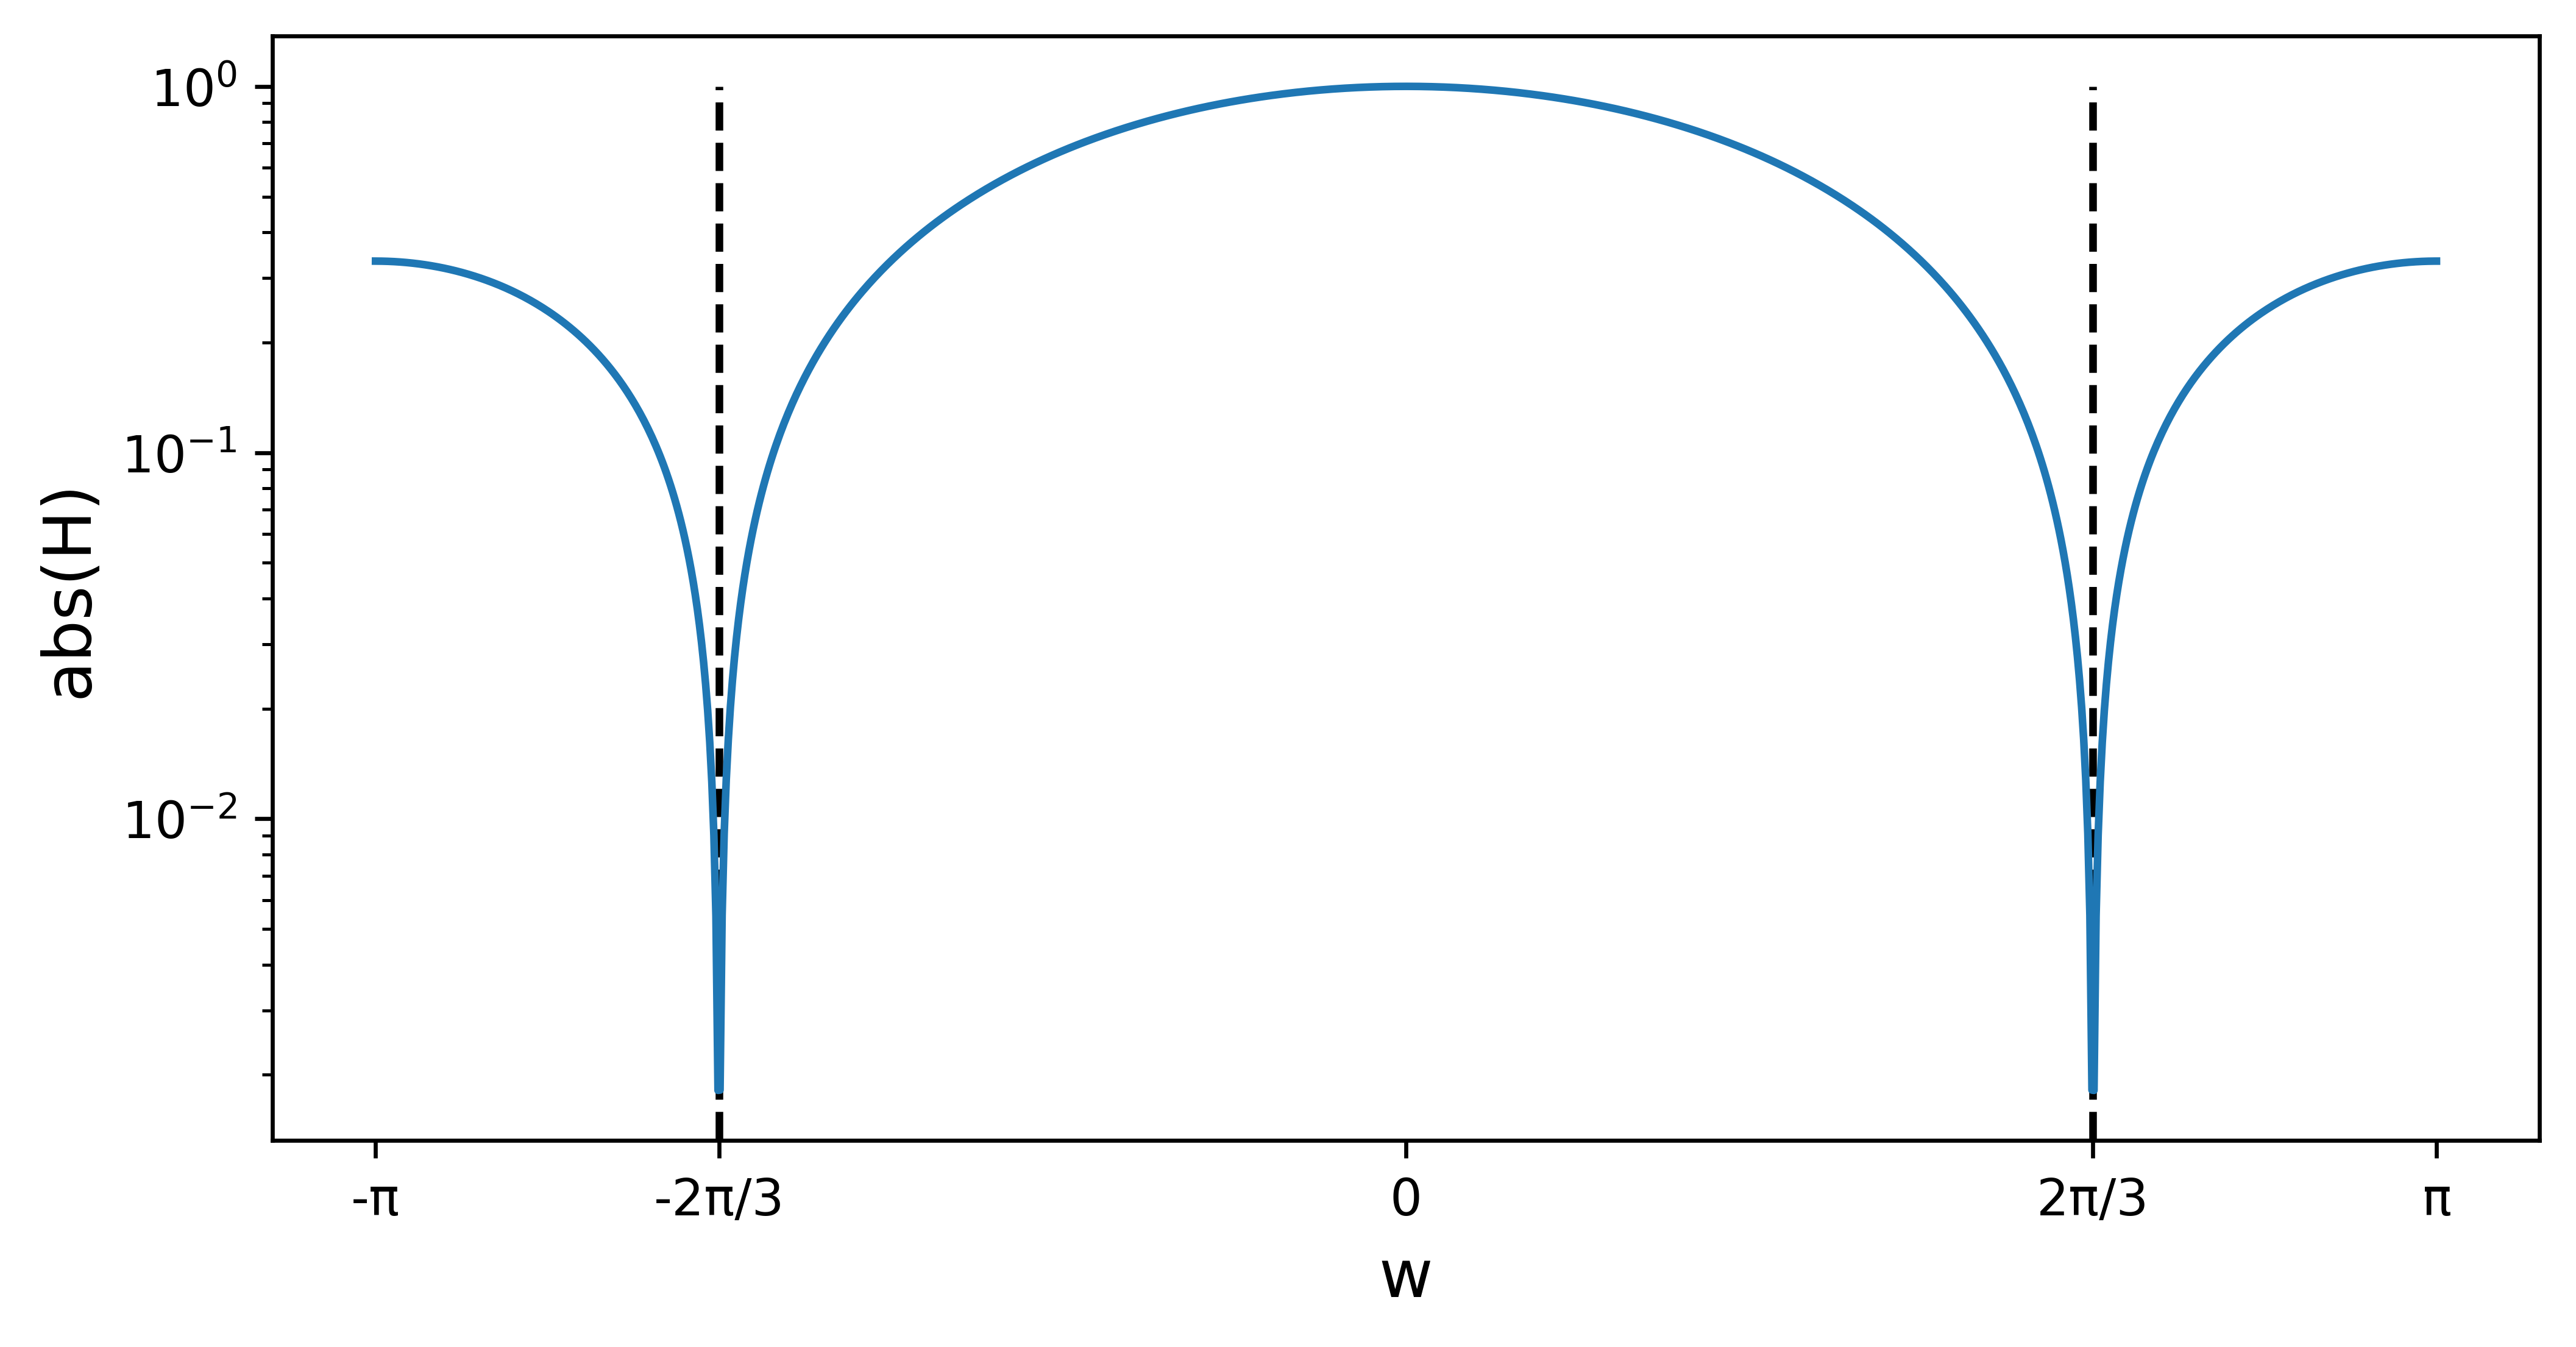

In [30]:
xvl = np.array([-2*np.pi/3,2*np.pi/3])
plt.figure(dpi=600,figsize=(8,4))
plt.semilogy(w,abs(H))
plt.vlines(xvl, 0, 1, color='k',linestyle='--')
plt.xticks([-np.pi,-2*np.pi/3,0,2*np.pi/3,np.pi],['-π','-2π/3',0,'2π/3','π'])
plt.xlabel('w', fontsize=13)
plt.ylabel('abs(H)', fontsize=13)
plt.show()

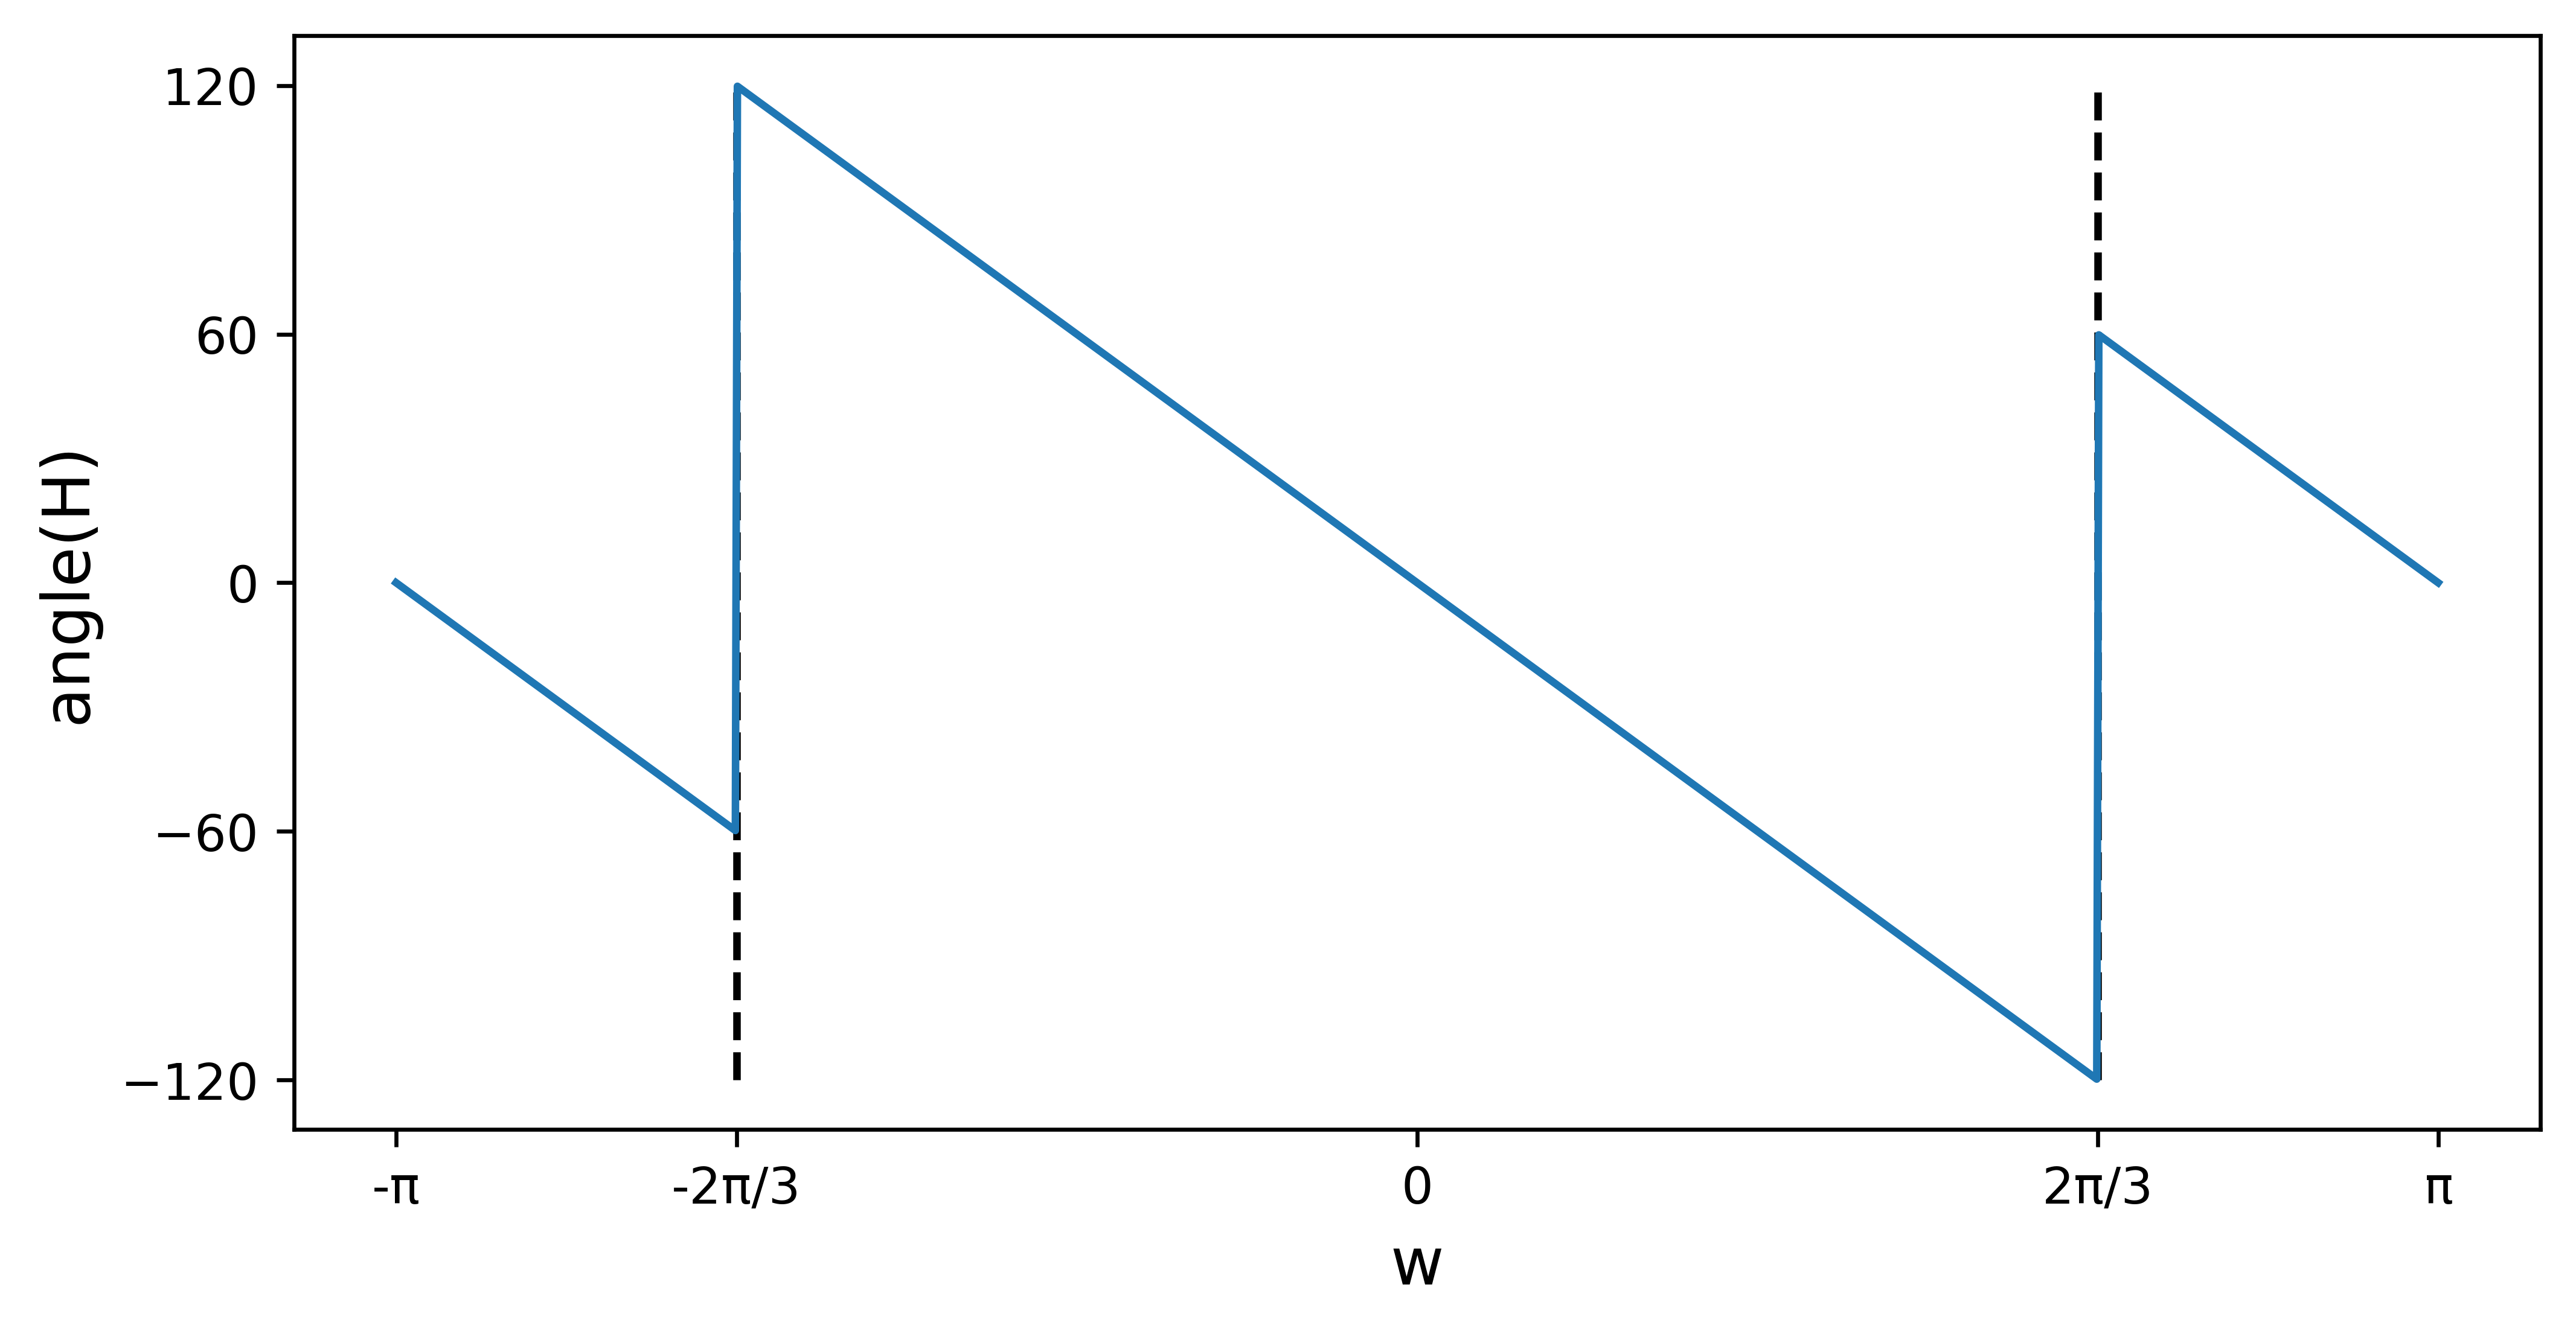

In [32]:
xvl = np.array([-2*np.pi/3,2*np.pi/3])
plt.figure(dpi=600,figsize=(8,4))
plt.plot(w,np.angle(H)*180/np.pi)
plt.vlines(xvl, -120, 120, color='k',linestyle='--')
plt.xticks([-np.pi,-2*np.pi/3,0,2*np.pi/3,np.pi],['-π','-2π/3',0,'2π/3','π'])
plt.yticks([-120,-60,0,60,120])
plt.xlabel('w', fontsize=13)
plt.ylabel('angle(H)', fontsize=13)
plt.show()

### Respuesta en frecuencia del FPM de orden 3 a partir de los coeficientes h(n)

In [38]:
c = np.array([1,1,1])/3
H1 = FIRrespf(w,c)

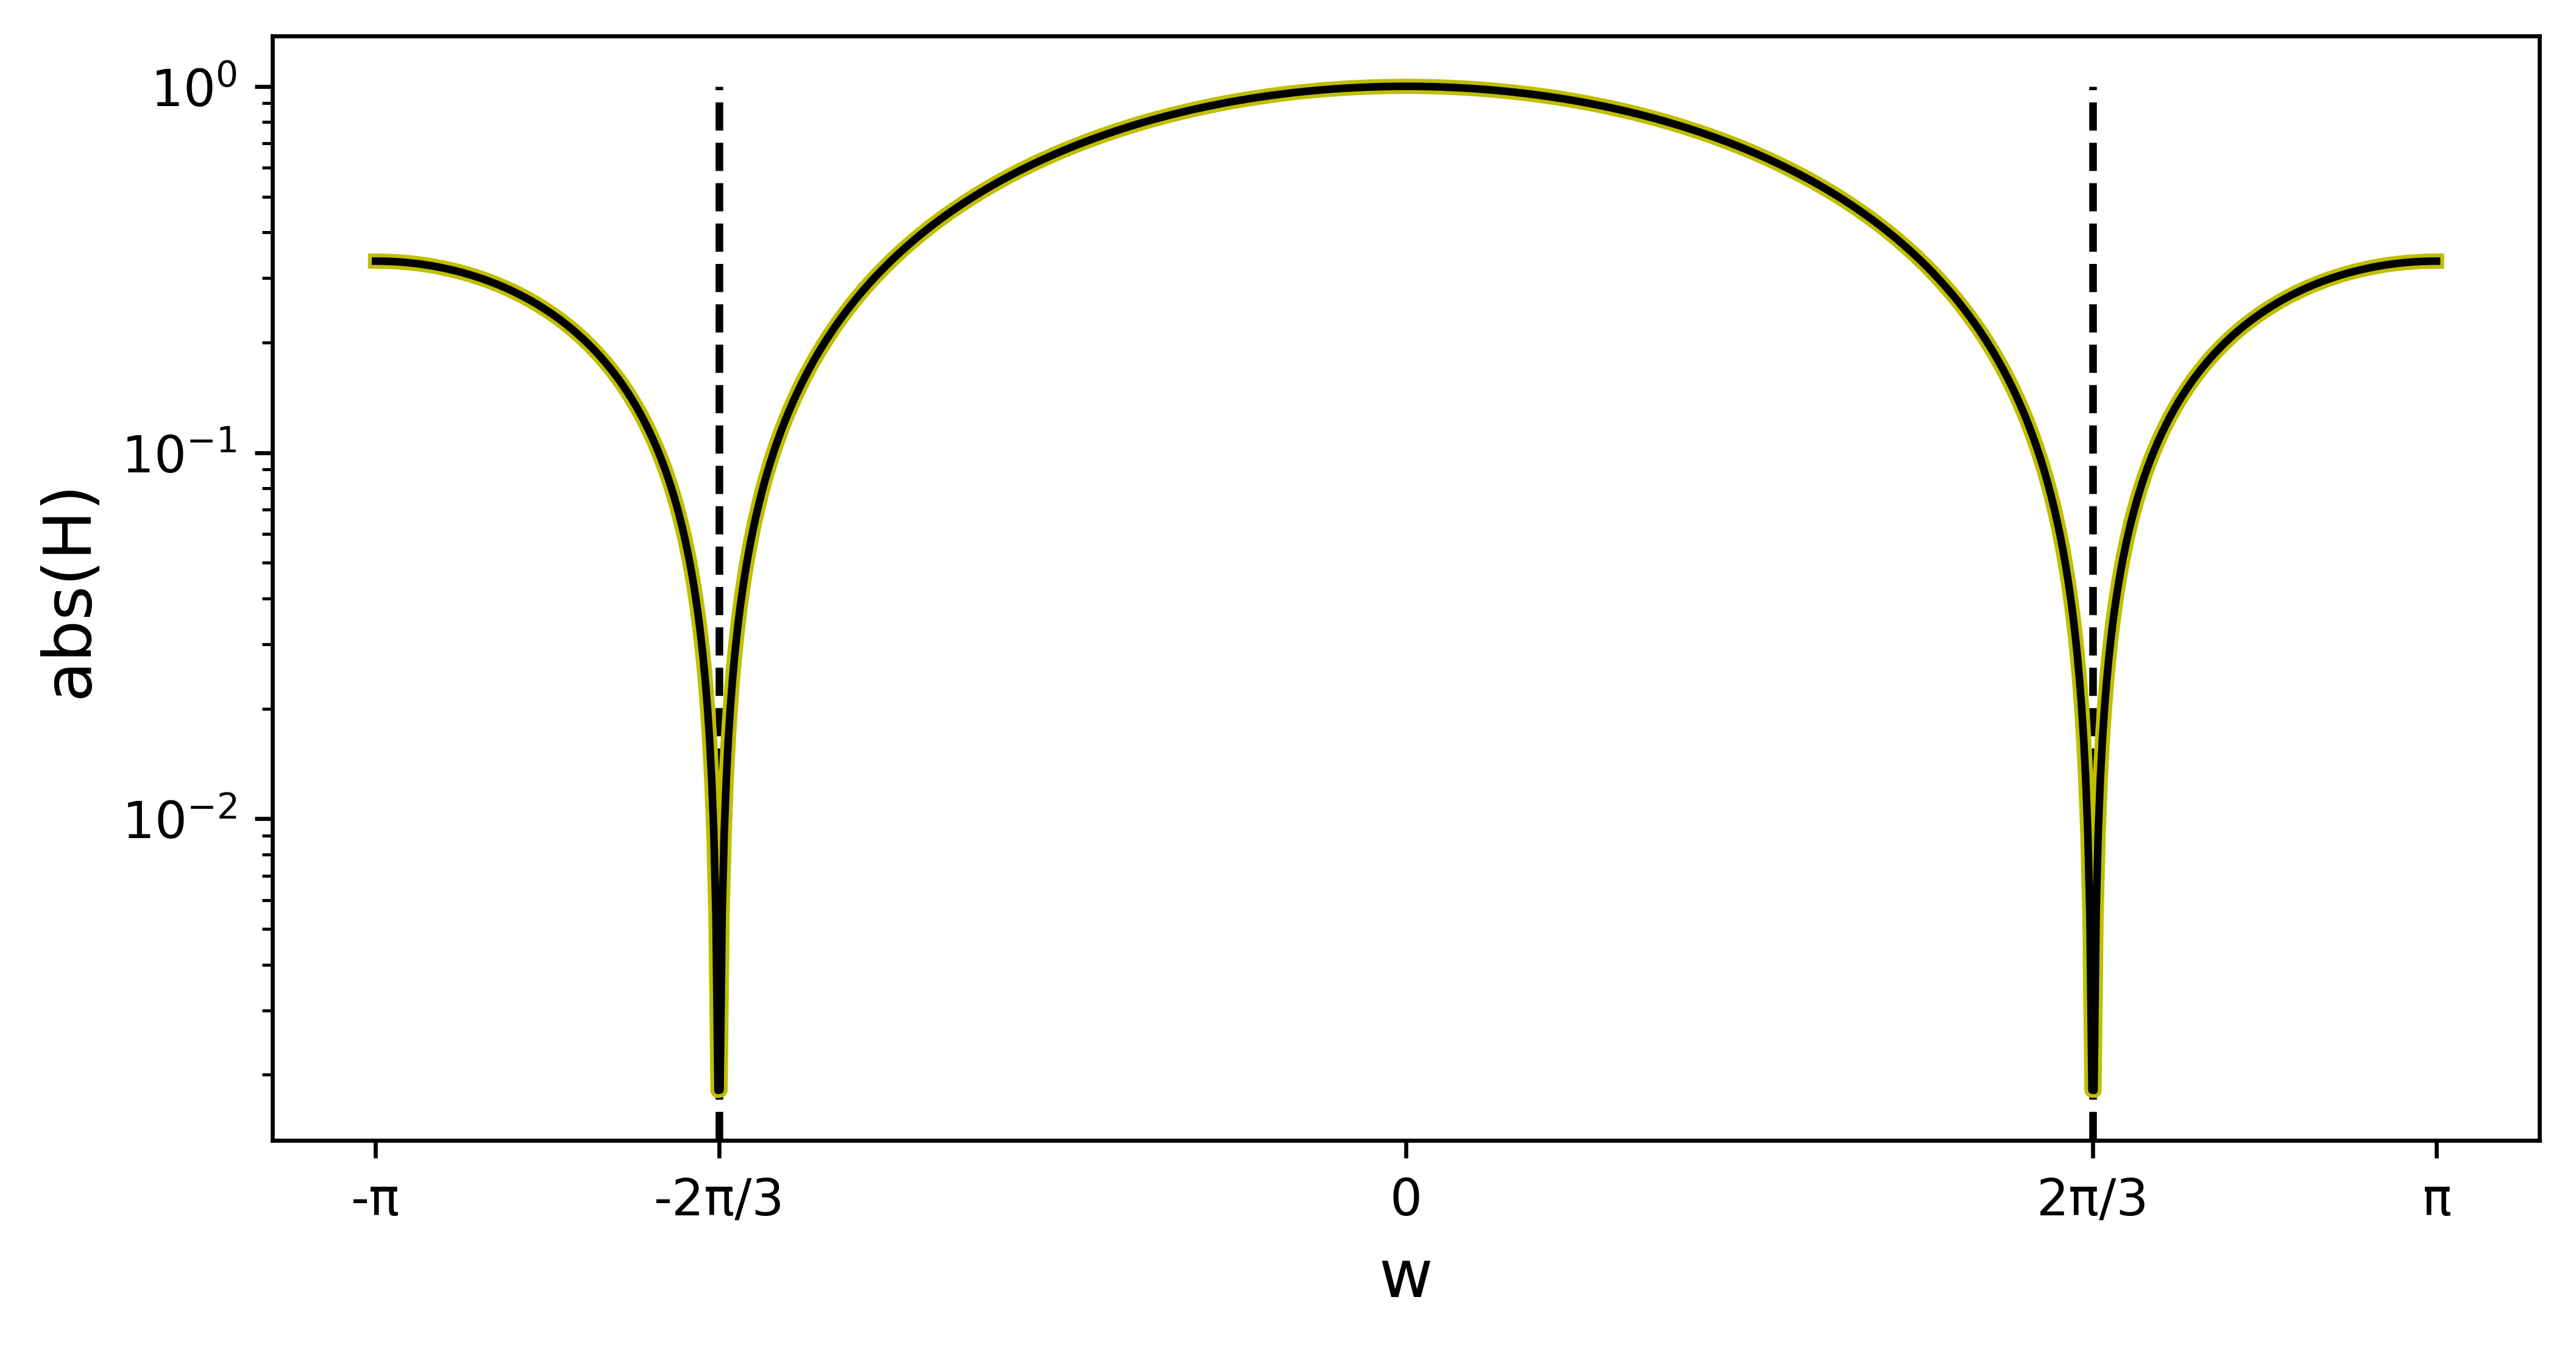

In [47]:
xvl = np.array([-2*np.pi/3,2*np.pi/3])
plt.figure(dpi=600,figsize=(8,4))
plt.plot(w,abs(H),'y',linewidth=3)
plt.semilogy(H1[:,0],H1[:,1],'k')
plt.vlines(xvl, 0, 1, color='k',linestyle='--')
plt.xticks([-np.pi,-2*np.pi/3,0,2*np.pi/3,np.pi],['-π','-2π/3',0,'2π/3','π'])
plt.xlabel('w', fontsize=13)
plt.ylabel('abs(H)', fontsize=13)
plt.show()

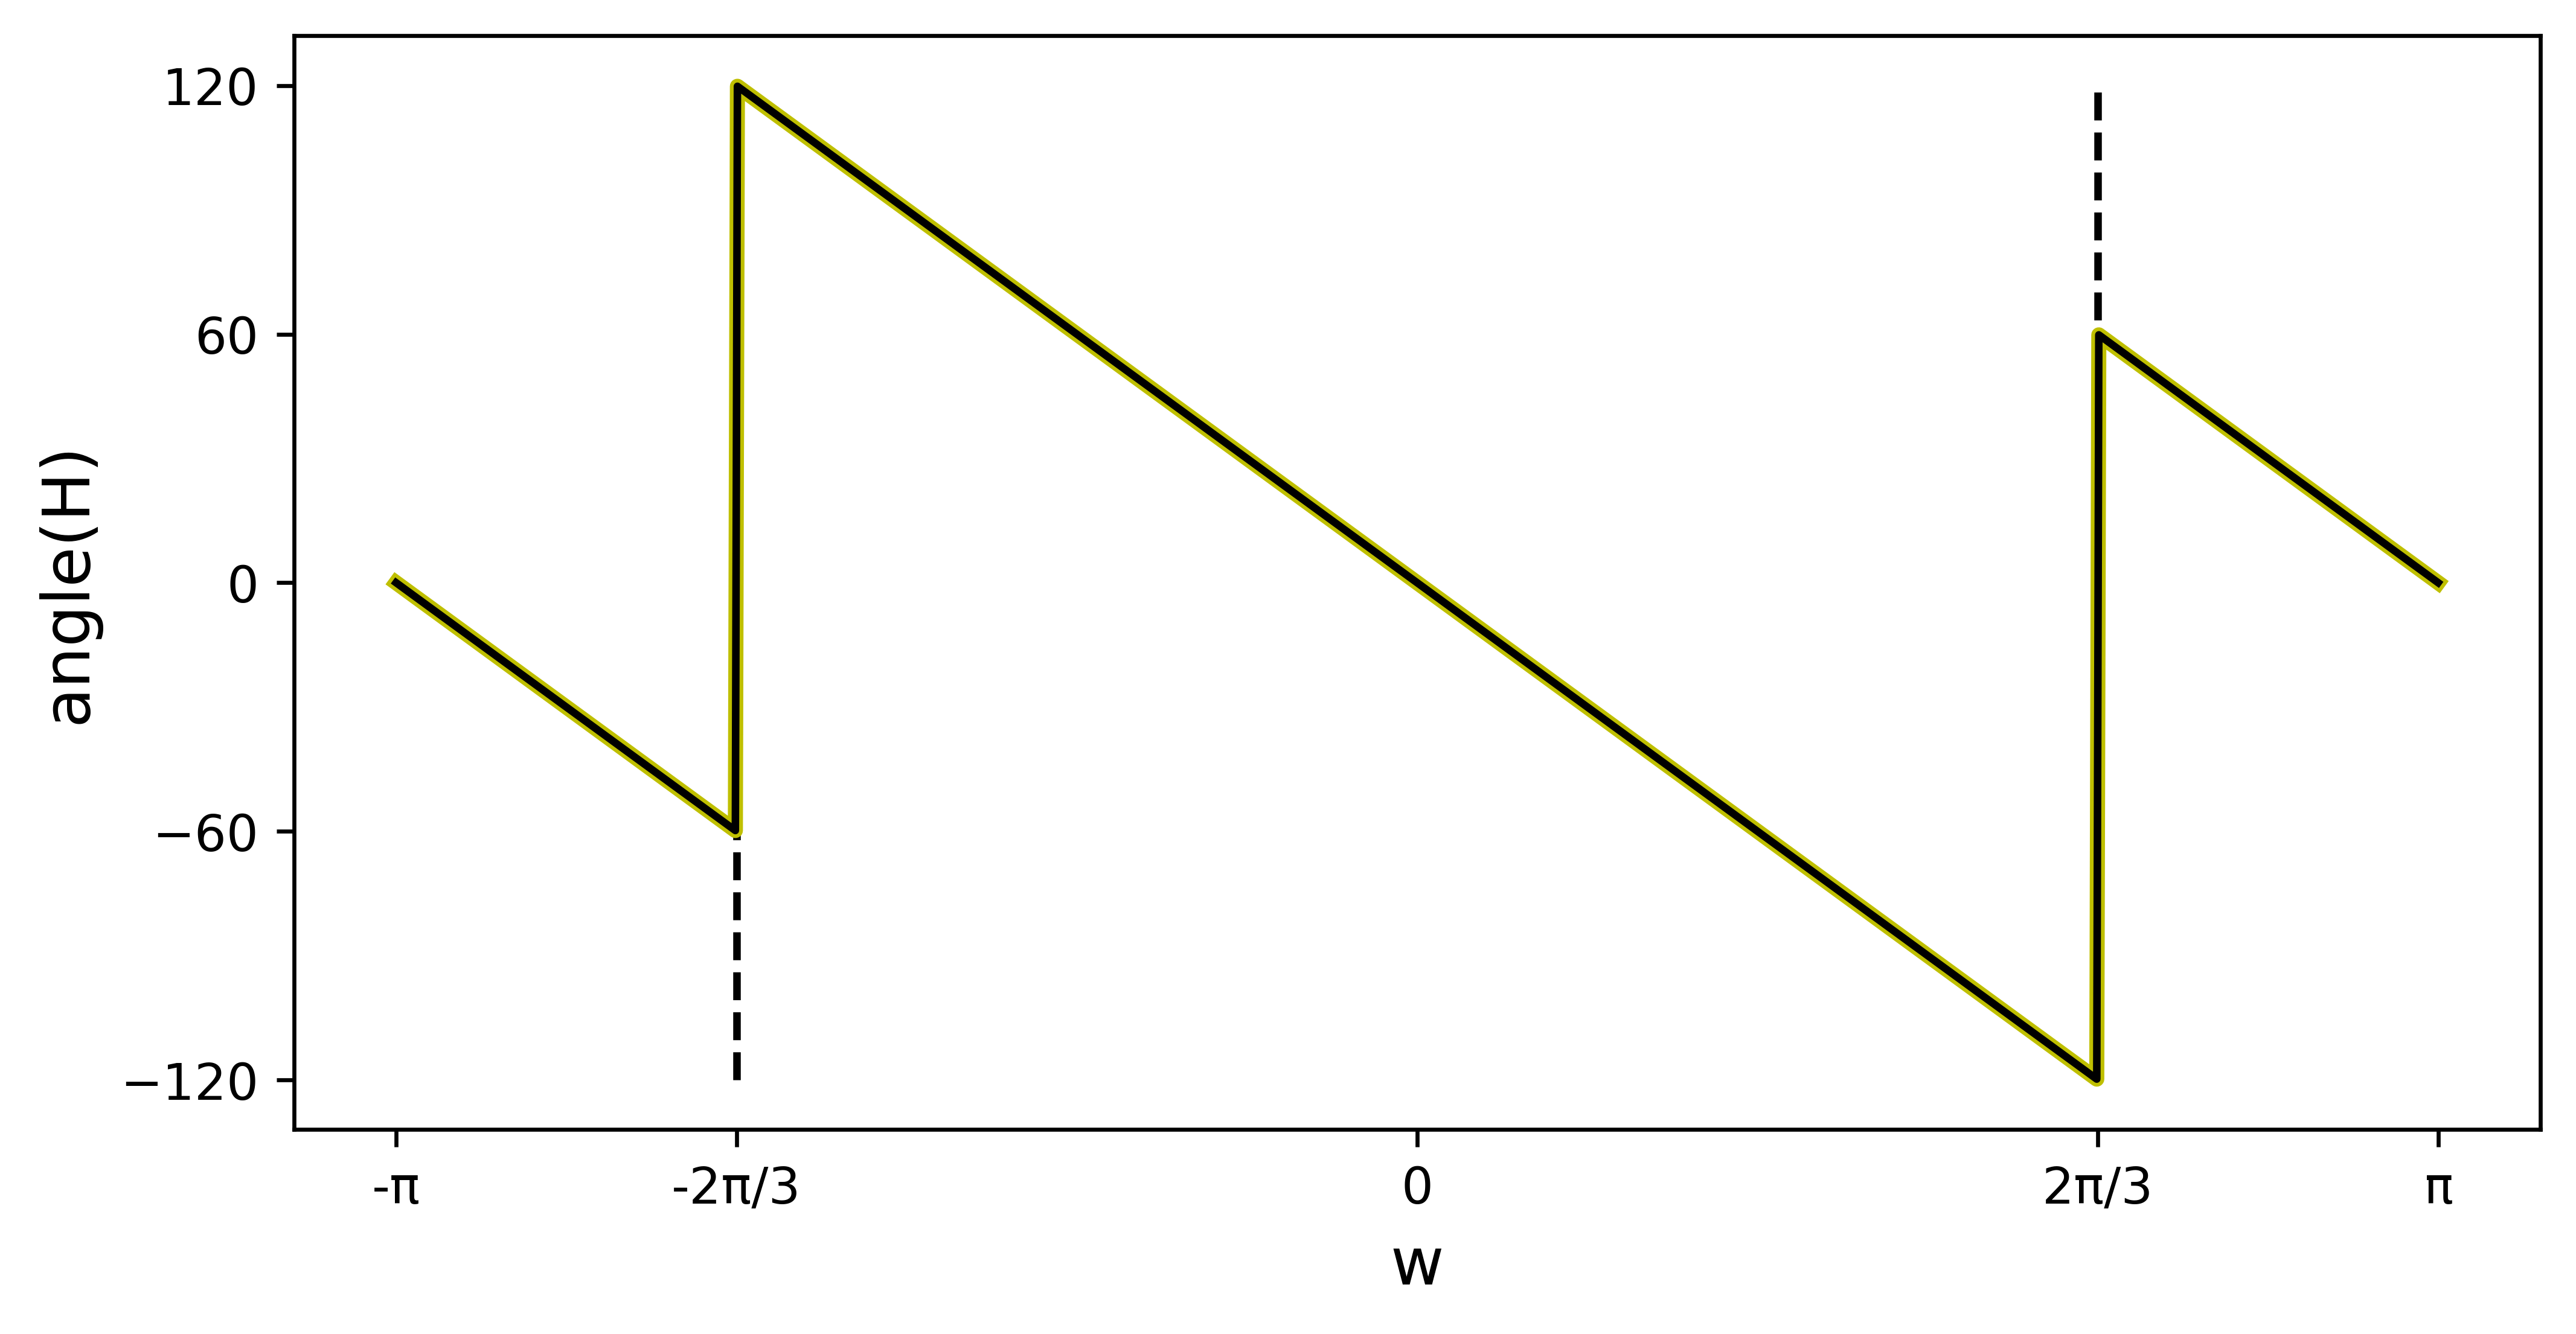

In [49]:
xvl = np.array([-2*np.pi/3,2*np.pi/3])
plt.figure(dpi=600,figsize=(8,4))
plt.plot(w,np.angle(H)*180/np.pi,'y',linewidth=3)
plt.plot(H1[:,0],H1[:,2]*180/np.pi,'k')
plt.vlines(xvl, -120, 120, color='k',linestyle='--')
plt.xticks([-np.pi,-2*np.pi/3,0,2*np.pi/3,np.pi],['-π','-2π/3',0,'2π/3','π'])
plt.yticks([-120,-60,0,60,120])
plt.xlabel('w', fontsize=13)
plt.ylabel('angle(H)', fontsize=13)
plt.show()

### Ejemplo 3: simula una señal de presión con ruido y diseña un filtro a partir de sus polos y ceros para eliminar el ruido

In [50]:
C , Fc, Fs = 80, 1, 400
A = [20.0000, 10.0240, 3.5560, 0.9800]
F = np.arange(1,5,1)* Fc
fase = [0, -0.5655, 1.0053, -2.1363]
N = 2000; n = np.arange(N)
pres = 0
for i in np.arange(4):
    pres = pres + C/4 + A[i]*np.cos(2*np.pi* F[i]*n/Fs-fase[i])


In [51]:
ruido1 = 5*np.sin(2*np.pi*75*n/Fs)
ruido2 = 5*np.sin(2*np.pi*120*n/Fs)
pres_ruido = pres + ruido1 + ruido2

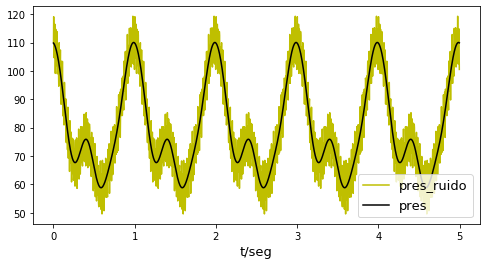

In [54]:
plt.figure(figsize=(8,4))
plt.plot(n/Fs,pres_ruido,c='y',label='pres_ruido')
plt.plot(n/Fs,pres,'k',label='pres')
plt.xlabel('t/seg', fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [55]:
esp = Espectro(pres_ruido)
p = np.arange(len(esp))

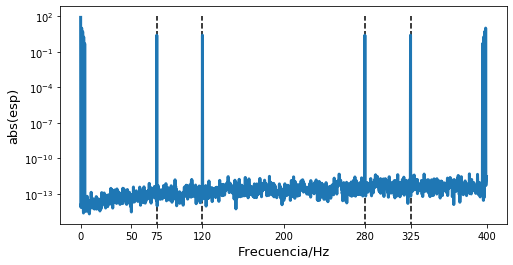

In [61]:
xvl = np.array([75,120,Fs-120,Fs-75])
plt.figure(figsize=(8,4))
plt.semilogy(p*Fs/N,abs(esp),linewidth=3)
plt.vlines(xvl, 0, 100, color='k',linestyle='--')
plt.xticks([0,50,75,120,200,Fs-120,Fs-75,Fs])
plt.xlabel('Frecuencia/Hz', fontsize=13)
plt.ylabel('abs(esp)', fontsize=13)
plt.show()

In [62]:
F = np.linspace(0,Fs,N); w = 2*np.pi*F/Fs
w1, w2 = 2*np.pi*75/Fs, 2*np.pi*120/Fs
q1 = np.cos(w1) +1j*np.sin(w1); q2 = np.conjugate(q1)
q3 = np.cos(w2) +1j*np.sin(w2); q4 = np.conjugate(q3)
ceros = np.array([q1,q2,q3,q4]); polos = np.array([0,0,0,0])
H = (np.exp(1j*w)-q1)*(np.exp(1j*w)-q2)*(np.exp(1j*w)-q3)*(np.exp(1j*w)-q4)/np.exp(1j*w)**4

In [63]:
ceros,polos

(array([ 0.38268343+0.92387953j,  0.38268343-0.92387953j,
        -0.30901699+0.95105652j, -0.30901699-0.95105652j]),
 array([0, 0, 0, 0]))

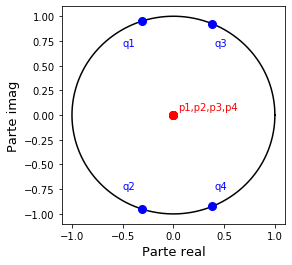

In [68]:
plt.figure(figsize=(4,4))
plt.plot(*Circunferencia(0,0,1), c='k')
plt.plot(ceros.real,ceros.imag,'bo',ms=8)
plt.plot(polos.real,polos.imag,'ro',ms=8)
plt.text(0.05,0.05,s='p1,p2,p3,p4',c='r')
plt.text(-0.5,0.7,s='q1',c='b')
plt.text(-0.5,-0.75,s='q2',c='b')
plt.text(0.4,0.7,s='q3',c='b')
plt.text(0.4,-0.75,s='q4',c='b')
plt.xlabel('Parte real', fontsize=13)
plt.ylabel('Parte imag', fontsize=13)
plt.show()

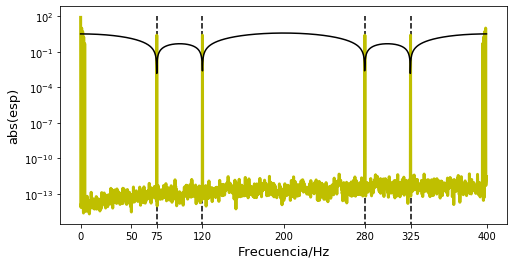

In [69]:
xvl = np.array([75,120,Fs-120,Fs-75])
plt.figure(figsize=(8,4))
plt.semilogy(p*Fs/N,abs(esp),'y',linewidth=3)
plt.semilogy(p*Fs/N,abs(H),'k')
plt.vlines(xvl, 0, 100, color='k',linestyle='--')
plt.xticks([0,50,75,120,200,Fs-120,Fs-75,Fs])
plt.xlabel('Frecuencia/Hz', fontsize=13)
plt.ylabel('abs(esp)', fontsize=13)
plt.show()

In [70]:
from Calculo_de_coeficientes_a_partir_de_polos_y_ceros import coeff

importing Jupyter notebook from Calculo_de_coeficientes_a_partir_de_polos_y_ceros.ipynb


In [71]:
h = coeff(ceros); nh = np.arange(len(h))
h, np.sum(h)

(array([ 1.        , -0.14733288,  1.52697726, -0.14733288,  1.        ]),
 3.2323115117732355)

In [75]:
pres_filtr = FIRrespt(n,pres_ruido,nh,h)
pres_filtr = pres_filtr[4:len(pres_filtr)-4]

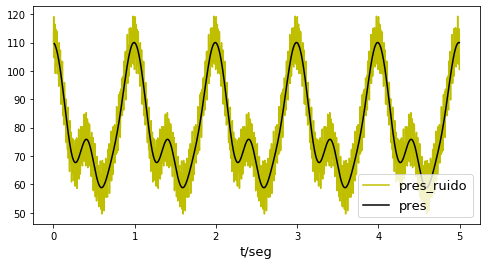

In [78]:
plt.figure(figsize=(8,4))
plt.plot(n/Fs,pres_ruido,c='y',label='pres_ruido')
plt.plot(pres_filtr[:,0]/Fs,pres_filtr[:,1]/np.sum(h),'k',label='pres')
plt.xlabel('t/seg', fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [79]:
esp_filtr = Espectro(pres_filtr[:,1]/np.sum(h))
p1 = np.arange(len(esp_filtr))

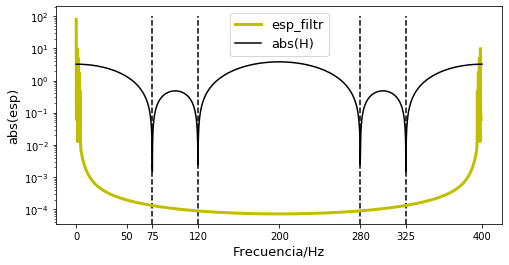

In [83]:
xvl = np.array([75,120,Fs-120,Fs-75])
plt.figure(figsize=(8,4))
plt.semilogy(p1*Fs/N,abs(esp_filtr),'y',linewidth=3,label='esp_filtr')
plt.semilogy(p*Fs/N,abs(H),'k',label='abs(H)')
plt.vlines(xvl, 0, 100, color='k',linestyle='--')
plt.xticks([0,50,75,120,200,Fs-120,Fs-75,Fs])
plt.xlabel('Frecuencia/Hz', fontsize=13)
plt.ylabel('abs(esp)', fontsize=13)
plt.legend(fontsize=13)
plt.show()

### Tarea: Encontrar y dibujar los polos y ceros, la respuesta al impulso unitario, al escalón unitario, al pulso rectangular y la respuesta en frecuencia de los siguientes filtros:
### (1) y(n) = -0.5 x(n) + x(n-2) -2 x(n-4)
### (2) y(n) = 0.5 y(n-1) - 2y(n-2) + x(n) - 3x(n-4)